# Pandas 基础

## Pandas介绍

In [ ]:
1. Pandas是什么?
Pandas是一个处理数据集数据的工具, 主要用于数据挖掘数据分析的开源Python库
2. 为什么要用Pandas?
便捷的数据处理能力
文件读取方便
封装了Matplotlib, Numpy的画图和计算

In [120]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [4]:
# 创建一个符合正太分布的10个股票5天的涨跌幅数据
stock_change = np.random.normal(size=[5, 10])

In [5]:
stock_change

array([[ 0.58492236,  1.0101665 , -0.3118005 ,  0.06072774,  1.10799563,
         0.94912017,  0.98321197,  0.35675636, -0.08948141,  0.6347561 ],
       [-1.58403794, -0.89154092,  1.50898111,  0.29757664,  2.16962742,
        -0.7309496 , -1.30943339, -0.20546413,  0.83062146,  0.78713435],
       [-0.46515407, -0.59774187,  2.32272976, -1.75546909, -0.29251869,
         1.82401712, -0.5068828 , -0.01688685,  0.10158242, -1.45084551],
       [ 0.67993544,  0.50317744, -0.01841426,  0.24230992,  1.52566273,
        -0.06598317, -0.02993126, -0.77715483, -0.481756  , -0.02645341],
       [-0.38904838, -0.19589413,  0.25388573, -0.37432188, -1.27808778,
        -0.1798515 , -1.82449728,  1.49776239,  0.17031915,  0.0423508 ]])

In [6]:
# 使用Pandas中的数据结构
stock_day_rise = pd.DataFrame(stock_change)

In [7]:
stock_day_rise

,0,1,2,3,4,5,6,7,8,9
0,0.584922,1.010166,-0.311800,0.060728,1.107996,0.949120,0.983212,0.356756,-0.089481,0.634756
1,-1.584038,-0.891541,1.508981,0.297577,2.169627,-0.730950,-1.309433,-0.205464,0.830621,0.787134
2,-0.465154,-0.597742,2.322730,-1.755469,-0.292519,1.824017,-0.506883,-0.016887,0.101582,-1.450846
3,0.679935,0.503177,-0.018414,0.242310,1.525663,-0.065983,-0.029931,-0.777155,-0.481756,-0.026453
4,-0.389048,-0.195894,0.253886,-0.374322,-1.278088,-0.179852,-1.824497,1.497762,0.170319,0.042351


In [9]:
# 构造行索引序列
stock_code = ['股票{}'.format(i) for i in range(stock_day_rise.shape[0])]

In [12]:
stock_code

['股票0', '股票1', '股票2', '股票3', '股票4']

In [13]:
# 添加行索引
data = pd.DataFrame(stock_day_rise, index=stock_code)

In [14]:
data

,0,1,2,3,4,5,6,7,8,9
股票0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
股票1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
股票2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
股票3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
股票4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# 添加列索引
# 生成一个时间序列, 略过周末非交易日
date = pd.date_range('2019-3-21', periods=stock_day_rise.shape[1], freq='B')

In [17]:
date

DatetimeIndex(['2019-03-21', '2019-03-22', '2019-03-25', '2019-03-26',
               '2019-03-27', '2019-03-28', '2019-03-29', '2019-04-01',
               '2019-04-02', '2019-04-03'],
              dtype='datetime64[ns]', freq='B')

In [18]:
# index代表行索引, columns代表列索引
data = pd.DataFrame(stock_change, index=stock_code, columns=date)

In [19]:
data

,2019-03-21 00:00:00,2019-03-22 00:00:00,2019-03-25 00:00:00,2019-03-26 00:00:00,2019-03-27 00:00:00,2019-03-28 00:00:00,2019-03-29 00:00:00,2019-04-01 00:00:00,2019-04-02 00:00:00,2019-04-03 00:00:00
股票0,0.584922,1.010166,-0.311800,0.060728,1.107996,0.949120,0.983212,0.356756,-0.089481,0.634756
股票1,-1.584038,-0.891541,1.508981,0.297577,2.169627,-0.730950,-1.309433,-0.205464,0.830621,0.787134
股票2,-0.465154,-0.597742,2.322730,-1.755469,-0.292519,1.824017,-0.506883,-0.016887,0.101582,-1.450846
股票3,0.679935,0.503177,-0.018414,0.242310,1.525663,-0.065983,-0.029931,-0.777155,-0.481756,-0.026453
股票4,-0.389048,-0.195894,0.253886,-0.374322,-1.278088,-0.179852,-1.824497,1.497762,0.170319,0.042351


### DataFrame介绍

In [ ]:
DataFrame是数据容器, 二维数组
DataFrame的结构, index行索引, columns列索引, values数据
DataFrame的常用属性和方法
    属性: index, columns, values, shape, T 
    方法:head(num), tail(num)

In [20]:
data.shape

(5, 10)

In [21]:
data.index

Index(['股票0', '股票1', '股票2', '股票3', '股票4'], dtype='object')

In [22]:
data.columns

DatetimeIndex(['2019-03-21', '2019-03-22', '2019-03-25', '2019-03-26',
               '2019-03-27', '2019-03-28', '2019-03-29', '2019-04-01',
               '2019-04-02', '2019-04-03'],
              dtype='datetime64[ns]', freq='B')

In [23]:
data.T

,股票0,股票1,股票2,股票3,股票4
2019-03-21,0.584922,-1.584038,-0.465154,0.679935,-0.389048
2019-03-22,1.010166,-0.891541,-0.597742,0.503177,-0.195894
2019-03-25,-0.311800,1.508981,2.322730,-0.018414,0.253886
2019-03-26,0.060728,0.297577,-1.755469,0.242310,-0.374322
2019-03-27,1.107996,2.169627,-0.292519,1.525663,-1.278088
2019-03-28,0.949120,-0.730950,1.824017,-0.065983,-0.179852
2019-03-29,0.983212,-1.309433,-0.506883,-0.029931,-1.824497
2019-04-01,0.356756,-0.205464,-0.016887,-0.777155,1.497762
2019-04-02,-0.089481,0.830621,0.101582,-0.481756,0.170319
2019-04-03,0.634756,0.787134,-1.450846,-0.026453,0.042351


In [24]:
data.values

array([[ 0.58492236,  1.0101665 , -0.3118005 ,  0.06072774,  1.10799563,
         0.94912017,  0.98321197,  0.35675636, -0.08948141,  0.6347561 ],
       [-1.58403794, -0.89154092,  1.50898111,  0.29757664,  2.16962742,
        -0.7309496 , -1.30943339, -0.20546413,  0.83062146,  0.78713435],
       [-0.46515407, -0.59774187,  2.32272976, -1.75546909, -0.29251869,
         1.82401712, -0.5068828 , -0.01688685,  0.10158242, -1.45084551],
       [ 0.67993544,  0.50317744, -0.01841426,  0.24230992,  1.52566273,
        -0.06598317, -0.02993126, -0.77715483, -0.481756  , -0.02645341],
       [-0.38904838, -0.19589413,  0.25388573, -0.37432188, -1.27808778,
        -0.1798515 , -1.82449728,  1.49776239,  0.17031915,  0.0423508 ]])

In [26]:
data.head(3)

,2019-03-21 00:00:00,2019-03-22 00:00:00,2019-03-25 00:00:00,2019-03-26 00:00:00,2019-03-27 00:00:00,2019-03-28 00:00:00,2019-03-29 00:00:00,2019-04-01 00:00:00,2019-04-02 00:00:00,2019-04-03 00:00:00
股票0,0.584922,1.010166,-0.311800,0.060728,1.107996,0.949120,0.983212,0.356756,-0.089481,0.634756
股票1,-1.584038,-0.891541,1.508981,0.297577,2.169627,-0.730950,-1.309433,-0.205464,0.830621,0.787134
股票2,-0.465154,-0.597742,2.322730,-1.755469,-0.292519,1.824017,-0.506883,-0.016887,0.101582,-1.450846


In [27]:
data.tail(3)

,2019-03-21 00:00:00,2019-03-22 00:00:00,2019-03-25 00:00:00,2019-03-26 00:00:00,2019-03-27 00:00:00,2019-03-28 00:00:00,2019-03-29 00:00:00,2019-04-01 00:00:00,2019-04-02 00:00:00,2019-04-03 00:00:00
股票2,-0.465154,-0.597742,2.322730,-1.755469,-0.292519,1.824017,-0.506883,-0.016887,0.101582,-1.450846
股票3,0.679935,0.503177,-0.018414,0.242310,1.525663,-0.065983,-0.029931,-0.777155,-0.481756,-0.026453
股票4,-0.389048,-0.195894,0.253886,-0.374322,-1.278088,-0.179852,-1.824497,1.497762,0.170319,0.042351


In [ ]:
DataFrame的索引设置
1. data_df.reset_index()  # 重置行索引, 默认保留旧索引, drop=True不保留旧索引
2. data_df.index  # 直接替换行索引
3. data_df.set_index  # 指定某行为行索引
4. data_df = pd.DataFrame(data, index=code)  # 创建DataFrame是指定行索引或者列索引

In [28]:
data.reset_index()

,index,2019-03-21 00:00:00,2019-03-22 00:00:00,2019-03-25 00:00:00,2019-03-26 00:00:00,2019-03-27 00:00:00,2019-03-28 00:00:00,2019-03-29 00:00:00,2019-04-01 00:00:00,2019-04-02 00:00:00,2019-04-03 00:00:00
0,股票0,0.584922,1.010166,-0.311800,0.060728,1.107996,0.949120,0.983212,0.356756,-0.089481,0.634756
1,股票1,-1.584038,-0.891541,1.508981,0.297577,2.169627,-0.730950,-1.309433,-0.205464,0.830621,0.787134
2,股票2,-0.465154,-0.597742,2.322730,-1.755469,-0.292519,1.824017,-0.506883,-0.016887,0.101582,-1.450846
3,股票3,0.679935,0.503177,-0.018414,0.242310,1.525663,-0.065983,-0.029931,-0.777155,-0.481756,-0.026453
4,股票4,-0.389048,-0.195894,0.253886,-0.374322,-1.278088,-0.179852,-1.824497,1.497762,0.170319,0.042351


In [29]:
data.reset_index(drop=True)

,2019-03-21 00:00:00,2019-03-22 00:00:00,2019-03-25 00:00:00,2019-03-26 00:00:00,2019-03-27 00:00:00,2019-03-28 00:00:00,2019-03-29 00:00:00,2019-04-01 00:00:00,2019-04-02 00:00:00,2019-04-03 00:00:00
0,0.584922,1.010166,-0.311800,0.060728,1.107996,0.949120,0.983212,0.356756,-0.089481,0.634756
1,-1.584038,-0.891541,1.508981,0.297577,2.169627,-0.730950,-1.309433,-0.205464,0.830621,0.787134
2,-0.465154,-0.597742,2.322730,-1.755469,-0.292519,1.824017,-0.506883,-0.016887,0.101582,-1.450846
3,0.679935,0.503177,-0.018414,0.242310,1.525663,-0.065983,-0.029931,-0.777155,-0.481756,-0.026453
4,-0.389048,-0.195894,0.253886,-0.374322,-1.278088,-0.179852,-1.824497,1.497762,0.170319,0.042351


In [35]:
data.index = ['中证股{}'.format(i) for i in range(data.shape[0])]

In [36]:
data

,2019-03-21 00:00:00,2019-03-22 00:00:00,2019-03-25 00:00:00,2019-03-26 00:00:00,2019-03-27 00:00:00,2019-03-28 00:00:00,2019-03-29 00:00:00,2019-04-01 00:00:00,2019-04-02 00:00:00,2019-04-03 00:00:00
中证股0,0.584922,1.010166,-0.311800,0.060728,1.107996,0.949120,0.983212,0.356756,-0.089481,0.634756
中证股1,-1.584038,-0.891541,1.508981,0.297577,2.169627,-0.730950,-1.309433,-0.205464,0.830621,0.787134
中证股2,-0.465154,-0.597742,2.322730,-1.755469,-0.292519,1.824017,-0.506883,-0.016887,0.101582,-1.450846
中证股3,0.679935,0.503177,-0.018414,0.242310,1.525663,-0.065983,-0.029931,-0.777155,-0.481756,-0.026453
中证股4,-0.389048,-0.195894,0.253886,-0.374322,-1.278088,-0.179852,-1.824497,1.497762,0.170319,0.042351


In [37]:
data.set_index(data.columns[0])

,2019-03-22 00:00:00,2019-03-25 00:00:00,2019-03-26 00:00:00,2019-03-27 00:00:00,2019-03-28 00:00:00,2019-03-29 00:00:00,2019-04-01 00:00:00,2019-04-02 00:00:00,2019-04-03 00:00:00
2019-03-21 00:00:00,,,,,,,,,
0.584922,1.010166,-0.311800,0.060728,1.107996,0.949120,0.983212,0.356756,-0.089481,0.634756
-1.584038,-0.891541,1.508981,0.297577,2.169627,-0.730950,-1.309433,-0.205464,0.830621,0.787134
-0.465154,-0.597742,2.322730,-1.755469,-0.292519,1.824017,-0.506883,-0.016887,0.101582,-1.450846
0.679935,0.503177,-0.018414,0.242310,1.525663,-0.065983,-0.029931,-0.777155,-0.481756,-0.026453
-0.389048,-0.195894,0.253886,-0.374322,-1.278088,-0.179852,-1.824497,1.497762,0.170319,0.042351


In [39]:
# 设置多个索引
data.set_index([data.columns[0], data.columns[1]])

,,2019-03-25 00:00:00,2019-03-26 00:00:00,2019-03-27 00:00:00,2019-03-28 00:00:00,2019-03-29 00:00:00,2019-04-01 00:00:00,2019-04-02 00:00:00,2019-04-03 00:00:00
2019-03-21 00:00:00,2019-03-22 00:00:00,,,,,,,,
0.584922,1.010166,-0.311800,0.060728,1.107996,0.949120,0.983212,0.356756,-0.089481,0.634756
-1.584038,-0.891541,1.508981,0.297577,2.169627,-0.730950,-1.309433,-0.205464,0.830621,0.787134
-0.465154,-0.597742,2.322730,-1.755469,-0.292519,1.824017,-0.506883,-0.016887,0.101582,-1.450846
0.679935,0.503177,-0.018414,0.242310,1.525663,-0.065983,-0.029931,-0.777155,-0.481756,-0.026453
-0.389048,-0.195894,0.253886,-0.374322,-1.278088,-0.179852,-1.824497,1.497762,0.170319,0.042351


### Series介绍
Series数据容器 一维数组
Series的结构 index, values
创建Series:
    指定内容, 默认索引 pd.Series(np.arange(10))
    指定索引 pd.Series(np.random.rand(10, 20, 10), np.arange(10))
    通过字典数据创建 pd.Series({'red':100, 'blue':200, 'green': 500, 'yellow':1000})

In [40]:
pd.Series(range(10))

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

In [41]:
type(pd.Series(range(10)))

pandas.core.series.Series

In [42]:
pd.Series(np.random.rand(10), range(10))

0    0.558015
1    0.878032
2    0.898684
3    0.982763
4    0.772807
5    0.592983
6    0.488386
7    0.588574
8    0.188577
9    0.100553
dtype: float64

In [44]:
pd.Series({'red':100, 'blue':200, 'green': 500, 'yellow':1000})

blue       200
green      500
red        100
yellow    1000
dtype: int64

### 索引操作

In [ ]:
结合loc或者iloc使用索引(先行后列)(推荐使用)
	loc：使用索引名字进行切片
	iloc：使用索引下标进行切片

In [45]:
# 读取文件
data = pd.read_csv("./data/stock_day.csv")

In [47]:
data.head(3)

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32


In [51]:
data['open']['2018-02-27']

23.53

In [69]:
data['open'].head()

2018-02-27    23.53
2018-02-26    22.80
2018-02-23    22.88
2018-02-22    22.25
2018-02-14    21.49
Name: open, dtype: float64

In [52]:
# 通过索引名获取数据, 先行后列
data.loc['2018-02-27':'2018-02-23', 'open']

2018-02-27    23.53
2018-02-26    22.80
2018-02-23    22.88
Name: open, dtype: float64

In [54]:
# 通过索引下标获取数据
data.iloc[0:2, 1:3]

,high,close
2018-02-27,25.88,24.16
2018-02-26,23.78,23.53


In [ ]:
排序操作
	df.sort_values(by, ascending)
		按某一列进行排序
	df.sort_index(ascending)
		对于行索引进行排序
	False  降序
    True 升序 默认

In [57]:
data.sort_index().head(5)

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2015-03-02,12.25,12.67,12.52,12.20,96291.73,0.32,2.62,12.520,12.520,12.520,96291.73,96291.73,96291.73,3.30
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,12.610,12.610,12.610,117681.67,117681.67,117681.67,4.76
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,12.707,12.707,12.707,100812.93,100812.93,100812.93,2.30
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,12.820,12.820,12.820,98904.79,98904.79,98904.79,3.19
2015-03-06,13.17,14.48,14.28,13.13,179831.72,1.12,8.51,13.112,13.112,13.112,115090.18,115090.18,115090.18,6.16


In [58]:
data.sort_index(ascending=False).head(5)

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58


In [65]:
data.sort_values(by='p_change').head(5)

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2015-09-01,14.78,14.78,13.46,13.46,78985.85,-1.50,-10.03,15.080,17.434,18.617,109001.30,103741.22,106218.95,2.70
2015-09-14,16.62,16.64,14.46,14.46,139701.77,-1.61,-10.02,14.726,14.363,16.881,98449.69,89159.54,101431.96,4.78
2016-01-11,16.59,17.24,15.90,15.90,58036.37,-1.77,-10.02,18.298,20.068,21.648,46971.51,52066.53,58356.88,1.99
2015-07-15,22.78,23.04,22.10,22.10,85966.42,-2.46,-10.02,24.564,25.197,28.530,158767.95,149753.04,149835.16,2.94
2015-08-26,17.00,18.35,15.56,15.56,130318.31,-1.73,-10.01,18.742,20.042,19.087,100097.45,114432.06,102945.90,4.46


In [67]:
data.sort_values(by=['open', 'high']).head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2015-03-02,12.25,12.67,12.52,12.20,96291.73,0.32,2.62,12.520,12.520,12.520,96291.73,96291.73,96291.73,3.30
2015-09-02,12.30,14.11,12.36,12.30,70201.74,-1.10,-8.17,14.440,16.591,18.360,96977.99,98537.72,104567.25,2.40
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,12.610,12.610,12.610,117681.67,117681.67,117681.67,4.76
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,12.707,12.707,12.707,100812.93,100812.93,100812.93,2.30
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,12.820,12.820,12.820,98904.79,98904.79,98904.79,3.19


In [71]:
data['p_change'].sort_index().head()

2015-03-02    2.62
2015-03-03    1.44
2015-03-04    1.57
2015-03-05    2.02
2015-03-06    8.51
Name: p_change, dtype: float64

### DataFrame运算

In [ ]:
DataFrame运算
	算术运算
		df.add(number)  加上一个具体的数字
		df.sub()  差, 两列相减
		df.mul()
			乘
		df.div()
			除
		主要用于按列按行对数据进行处理
	逻辑运算: 返回逻辑结果True或False
		逻辑运算符号<、 >、|、 &
		逻辑运算函数
			df.query(expr)
				逻辑判断表达式的字符串
			df.isin(values) 例如例如
	统计运算
		df.describe()
			综合分析, 能够直接得出很多统计结果,count, mean, std, min, max 等
		统计函数
			df.mode(axis): 求众数（数据中出现次数最多的数）
			df.prod(axis): 求乘积，将所有数据乘起来
			df.median(axis): 求中位数，排在所有数据中间那个数的值
            max, min, std, var, mean
            idxmax: 求出最大值的位置
            idxmin: 求出最小值的位置
			25%
			75%
		累计统计函数
			df.cumsum()：累计和
			df.cummax()：累计最大值
			df.cummin()：累计最小值
			df.cumprod()：累计乘积
	自定义运算
		 df.apply(func, axis=0)
			设置按行处理还是按列处理
			axis=0 按列处理 axis=1为行进行运算

In [72]:
data.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58


In [74]:
data['open'].add(1).head()

2018-02-27    24.53
2018-02-26    23.80
2018-02-23    23.88
2018-02-22    23.25
2018-02-14    22.49
Name: open, dtype: float64

In [76]:
data['high'].sub(data['low']).head()

2018-02-27    2.35
2018-02-26    0.98
2018-02-23    0.66
2018-02-22    0.74
2018-02-14    0.51
dtype: float64

In [78]:
data['open'].mul(data['price_change']).head()

2018-02-27    14.8239
2018-02-26    15.7320
2018-02-23    12.3552
2018-02-22     8.0100
2018-02-14     9.4556
dtype: float64

In [82]:
data['open'].div(data['price_change']).head()

2018-02-27    37.349206
2018-02-26    33.043478
2018-02-23    42.370370
2018-02-22    61.805556
2018-02-14    48.840909
dtype: float64

In [ ]:
# 逻辑计算

In [85]:
a = data['p_change'] > 2
a.head()

2018-02-27     True
2018-02-26     True
2018-02-23     True
2018-02-22    False
2018-02-14     True
Name: p_change, dtype: bool

In [87]:
# 逻辑判断的结果可以作为筛选的依据
data[data['p_change'] > 2].head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58
2018-02-12,20.70,21.40,21.19,20.63,32445.39,0.82,4.03,21.504,22.338,23.533,44645.16,45679.94,68686.33,0.81


In [89]:
data[(data['p_change'] > 2) & (data['open'] > 15)].head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58
2018-02-12,20.70,21.40,21.19,20.63,32445.39,0.82,4.03,21.504,22.338,23.533,44645.16,45679.94,68686.33,0.81


### 逻辑运算函数

In [92]:
data.query("p_change < 2 & turnover < 15").head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90
2018-02-13,21.40,21.90,21.48,21.31,30802.45,0.28,1.32,21.342,22.103,23.387,39694.65,45518.14,65161.68,0.77
2018-02-09,21.20,21.46,20.36,20.19,54304.01,-1.50,-6.86,21.920,22.596,23.645,48624.36,48982.38,70552.47,1.36
2018-02-08,21.79,22.09,21.88,21.75,27068.16,0.09,0.41,22.372,23.009,23.839,44411.98,48612.16,73852.45,0.68
2018-02-07,22.69,23.11,21.80,21.29,53853.25,-0.50,-2.24,22.480,23.258,23.929,52281.28,56315.11,74925.33,1.35


In [93]:
data[data['turnover'].isin([4.19, 2.39])]

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2017-07-25,23.07,24.20,23.70,22.64,167489.48,0.67,2.91,23.042,22.759,22.199,137135.54,156145.65,166607.70,4.19
2016-09-28,19.88,20.98,20.86,19.71,95580.75,0.98,4.93,20.458,20.897,21.784,73619.52,69253.23,107749.35,2.39
2015-04-07,16.54,17.98,17.54,16.50,122471.85,0.88,5.28,16.620,16.120,15.510,86769.62,97473.29,98832.94,4.19


### 统计运算

In [94]:
data.describe()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
count,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000
mean,21.272706,21.900513,21.336267,20.771835,99905.519114,0.018802,0.190280,21.302362,21.267656,21.200946,100008.642691,100287.542177,100797.518398,2.936190
std,3.930973,4.077578,3.942806,3.791968,73879.119354,0.898476,4.079698,3.880640,3.813602,3.686186,62761.578326,56759.082060,50101.575639,2.079375
min,12.250000,12.670000,12.360000,12.200000,1158.120000,-3.520000,-10.030000,12.520000,12.520000,12.520000,10804.740000,19130.510000,23311.000000,0.040000
25%,19.000000,19.500000,19.045000,18.525000,48533.210000,-0.390000,-1.850000,18.990000,19.102000,19.275000,55794.985000,59861.955000,64103.675000,1.360000
50%,21.440000,21.970000,21.450000,20.980000,83175.930000,0.050000,0.260000,21.504000,21.623000,21.530000,86133.330000,89234.970000,96291.730000,2.500000
75%,23.400000,24.065000,23.415000,22.850000,127580.055000,0.455000,2.305000,23.318000,23.098500,23.136000,127655.655000,124693.255000,124001.015000,3.915000
max,34.990000,36.350000,35.210000,34.010000,501915.410000,3.030000,10.030000,33.696000,32.186000,29.998000,404443.540000,360028.160000,269280.790000,12.560000


In [95]:
# 使用统计函数：0 代表列求结果， 1 代表行求统计结果
data.max(0)

open                34.990
high                36.350
close               35.210
low                 34.010
volume          501915.410
price_change         3.030
p_change            10.030
ma5                 33.696
ma10                32.186
ma20                29.998
v_ma5           404443.540
v_ma10          360028.160
v_ma20          269280.790
turnover            12.560
dtype: float64

In [96]:
data.min()

open               12.25
high               12.67
close              12.36
low                12.20
volume           1158.12
price_change       -3.52
p_change          -10.03
ma5                12.52
ma10               12.52
ma20               12.52
v_ma5           10804.74
v_ma10          19130.51
v_ma20          23311.00
turnover            0.04
dtype: float64

In [97]:
data.std()

open                3.930973
high                4.077578
close               3.942806
low                 3.791968
volume          73879.119354
price_change        0.898476
p_change            4.079698
ma5                 3.880640
ma10                3.813602
ma20                3.686186
v_ma5           62761.578326
v_ma10          56759.082060
v_ma20          50101.575639
turnover            2.079375
dtype: float64

In [98]:
data.var()

open            1.545255e+01
high            1.662665e+01
close           1.554572e+01
low             1.437902e+01
volume          5.458124e+09
price_change    8.072595e-01
p_change        1.664394e+01
ma5             1.505937e+01
ma10            1.454356e+01
ma20            1.358797e+01
v_ma5           3.939016e+09
v_ma10          3.221593e+09
v_ma20          2.510168e+09
turnover        4.323800e+00
dtype: float64

In [99]:
data.median()

open               21.440
high               21.970
close              21.450
low                20.980
volume          83175.930
price_change        0.050
p_change            0.260
ma5                21.504
ma10               21.623
ma20               21.530
v_ma5           86133.330
v_ma10          89234.970
v_ma20          96291.730
turnover            2.500
dtype: float64

In [100]:
data.idxmax()

open            2015-06-15
high            2015-06-10
close           2015-06-12
low             2015-06-12
volume          2017-10-26
price_change    2015-06-09
p_change        2015-08-28
ma5             2015-06-15
ma10            2015-06-18
ma20            2015-06-18
v_ma5           2017-10-26
v_ma10          2017-11-02
v_ma20          2017-11-15
turnover        2017-10-26
dtype: object

In [101]:
data.idxmin()

open            2015-03-02
high            2015-03-02
close           2015-09-02
low             2015-03-02
volume          2016-07-06
price_change    2015-06-15
p_change        2015-09-01
ma5             2015-03-02
ma10            2015-03-02
ma20            2015-03-02
v_ma5           2017-02-03
v_ma10          2017-02-03
v_ma20          2017-05-23
turnover        2016-07-06
dtype: object

### 累计统计函数

In [103]:
data.cumsum().tail()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2015-03-06,13627.90,14029.93,13667.94,13306.09,63843629.62,11.13,114.70,13646.762,13624.446,13581.551,63891866.13,64071198.50,64399113.21,1874.42
2015-03-05,13640.78,14043.38,13681.10,13318.96,63936810.01,11.39,116.72,13659.582,13637.266,13594.371,63990770.92,64170103.29,64498018.00,1877.61
2015-03-04,13653.58,14056.30,13694.00,13331.57,64003885.45,11.59,118.29,13672.289,13649.973,13607.078,64091583.85,64270916.22,64598830.93,1879.91
2015-03-03,13666.10,14069.36,13706.70,13344.09,64142957.06,11.77,119.73,13684.899,13662.583,13619.688,64209265.52,64388597.89,64716512.60,1884.67
2015-03-02,13678.35,14082.03,13719.22,13356.29,64239248.79,12.09,122.35,13697.419,13675.103,13632.208,64305557.25,64484889.62,64812804.33,1887.97


In [104]:
data.cummin().tail()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2015-03-06,12.30,13.38,12.36,12.3,1158.12,-3.52,-10.03,13.112,13.112,13.112,10804.74,19130.51,23311.0,0.04
2015-03-05,12.30,13.38,12.36,12.3,1158.12,-3.52,-10.03,12.820,12.820,12.820,10804.74,19130.51,23311.0,0.04
2015-03-04,12.30,12.92,12.36,12.3,1158.12,-3.52,-10.03,12.707,12.707,12.707,10804.74,19130.51,23311.0,0.04
2015-03-03,12.30,12.92,12.36,12.3,1158.12,-3.52,-10.03,12.610,12.610,12.610,10804.74,19130.51,23311.0,0.04
2015-03-02,12.25,12.67,12.36,12.2,1158.12,-3.52,-10.03,12.520,12.520,12.520,10804.74,19130.51,23311.0,0.04


In [106]:
data.cumprod().head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,2.353000e+01,2.588000e+01,2.416000e+01,2.353000e+01,9.557803e+04,0.630000,2.680000,2.294200e+01,2.214200e+01,2.287500e+01,5.378264e+04,4.673865e+04,5.557611e+04,2.390000
2018-02-26,5.364840e+02,6.154264e+02,5.684848e+02,5.364840e+02,5.828837e+09,0.434700,8.093600,5.140385e+02,4.861276e+02,5.247982e+02,2.195812e+09,1.997439e+09,3.112679e+09,3.656700
2018-02-23,1.227475e+04,1.438251e+04,1.297282e+04,1.218355e+04,3.084271e+14,0.234738,19.586512,1.127698e+04,1.066029e+04,1.208191e+04,7.711599e+13,8.363670e+13,1.754706e+14,4.826844
2018-02-22,2.731133e+05,3.273460e+05,2.890345e+05,2.682818e+05,1.113576e+19,0.084506,32.121880,2.418460e+05,2.335563e+05,2.795390e+05,2.729719e+18,3.337504e+18,1.055449e+19,4.344160
2018-02-14,5.869204e+06,7.198339e+06,6.335636e+06,5.762693e+06,2.598090e+23,0.037182,65.849853,5.167282e+06,5.120256e+06,6.500121e+06,9.169185e+22,1.432982e+23,6.513818e+23,2.519613


### 自定义运算

In [107]:
data[['open', 'close']].apply(lambda x: x.max() - x.min(), axis=0)

open     22.74
close    22.85
dtype: float64

## 画图

In [ ]:
Pandas画图
	API：DataFrame.plot(x=None, y=None, kind='line')
	参数说明：x,y 是df中的列名，kind指定画图类型
		kind: 类型, 种类
	line
		折线图
	hist
	pie
	bar # 柱状图
	barh
	scatter

In [115]:
a = np.linspace(1, 12, 12)

In [116]:
a

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [112]:
b = np.linspace(1, 12, 12)

In [113]:
b

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [125]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [126]:
ts = ts.cumsum()

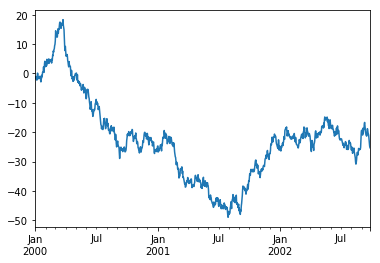

In [127]:
ts.plot()

### 文件读取与存储

In [133]:
data = pd.read_csv('./data/stock_day.csv', usecols=['open', 'high'])

In [134]:
data.head()

,open,high
2018-02-27,23.53,25.88
2018-02-26,22.80,23.78
2018-02-23,22.88,23.37
2018-02-22,22.25,22.76
2018-02-14,21.49,21.99


In [135]:
# 选取10行数据保存,便于观察数据
data[:10].to_csv("./data/test.csv", columns=['open'])

In [138]:
pd.read_csv("./data/test.csv").head()

,Unnamed: 0,open
0,2018-02-27,23.53
1,2018-02-26,22.80
2,2018-02-23,22.88
3,2018-02-22,22.25
4,2018-02-14,21.49


In [ ]:
会发现将索引存入到文件当中，变成单独的一列数据。如果需要删除，可以指定index参数,删除原来的文件，重新保存一次。

In [139]:
# index:存储不会讲索引值变成一列数据
data[:10].to_csv("./data/test.csv", columns=['open'], index=False)

In [140]:
data = pd.read_csv("./data/test.csv")

In [142]:
data.head()

,open
0,23.53
1,22.80
2,22.88
3,22.25
4,21.49


#### hdf5 文件读写

In [179]:
# 读取文件
data_hdf = pd.read_hdf('./data/stock_data/day/day_eps_ttm.h5')

In [180]:
data_hdf.head()

,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,001965.SZ,603283.SH,002920.SZ,002921.SZ,300684.SZ,002922.SZ,300735.SZ,603329.SH,603655.SH,603080.SH
0,0.44999,0.42051,-0.157878,-0.089765,1.061339,-0.036714,-0.043017,0.079477,-0.590716,0.019715,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.44999,0.42051,-0.157878,-0.089765,1.061339,-0.036714,-0.043017,0.079477,-0.590716,0.019715,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.44999,0.42051,-0.157878,-0.089765,1.061339,-0.036714,-0.043017,0.079477,-0.590716,0.019715,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.44999,0.42051,-0.157878,-0.089765,1.061339,-0.036714,-0.043017,0.079477,-0.590716,0.019715,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.44999,0.42051,-0.157878,-0.089765,1.061339,-0.036714,-0.043017,0.079477,-0.590716,0.019715,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [183]:
# 存储文件
data_hdf.to_hdf('./test.h5', key='000001.SZ')

In [185]:
data = pd.read_hdf('./test.h5', key='000001.SZ')

In [186]:
data.head()

,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,001965.SZ,603283.SH,002920.SZ,002921.SZ,300684.SZ,002922.SZ,300735.SZ,603329.SH,603655.SH,603080.SH
0,0.44999,0.42051,-0.157878,-0.089765,1.061339,-0.036714,-0.043017,0.079477,-0.590716,0.019715,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.44999,0.42051,-0.157878,-0.089765,1.061339,-0.036714,-0.043017,0.079477,-0.590716,0.019715,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.44999,0.42051,-0.157878,-0.089765,1.061339,-0.036714,-0.043017,0.079477,-0.590716,0.019715,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.44999,0.42051,-0.157878,-0.089765,1.061339,-0.036714,-0.043017,0.079477,-0.590716,0.019715,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.44999,0.42051,-0.157878,-0.089765,1.061339,-0.036714,-0.043017,0.079477,-0.590716,0.019715,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### JSON 文件读写

In [188]:
# 读取文件
data_json = pd.read_json('./data/Sarcasm_Headlines_Dataset.json', orient='records', lines=True)

In [190]:
data_json.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [192]:
data_json.to_json("./data/test.json", orient='records')

# Pandas高级数据处理

## 缺失值的处理

In [ ]:
缺失值处理
	np.nan    not a number  缺失值(空值): 表示没有值,没有任何东西  DataFrame显示 NaN 数据类型是float

特殊标记 ? ' ' 缺失的情况
	判断缺失值是否存在
		pd.isnull(df)
			isnull: 是缺失值,返回True, 不是缺失值, 返回False
		pd.notnull(df)
			notnull: 不是缺失值, 返回True, 不是缺失值, 返回False
		np.any(pd.isnull(data))
			np.any(): 是否含有True 
		np.all(pd.notnull(data))
			np.all(): 是否都为True
	如何处理缺失值 np.nan
		缺失值是np.nan 
			df.dropna()
				删除缺失值
			df.fillna(mean, inplace)
				填充缺失值
		缺失值不是np.nan ，有特殊标记
			1. 先把标记的数据替换成np.nan
2. 通过df.dropna()和df.fillna(mean, inplace)处理
	处理缺失值的思路: 
1. 删除, 整行删除, 整个样本
2. 填充 填充一个合理的数组 平均值(最常用) 中位数 众数

In [194]:
# 读取有缺失值的数据
data = pd.read_csv('./data/IMDB-Movie-Data.csv')

In [199]:
data

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


In [196]:
# 判断缺失值存在的方法
np.any(pd.isnull(data))

True

In [197]:
np.all(pd.notnull(data))

False

In [198]:
np.all(pd.notnull(data))

False

### 处理缺失值

In [202]:
# 1. 删除, Pandas删除缺失值,不改变原数据 缺失值类型必须是np.nan
data.dropna()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0
10,11,Fantastic Beasts and Where to Find Them,"Adventure,Family,Fantasy",The adventures of writer Newt Scamander in New...,David Yates,"Eddie Redmayne, Katherine Waterston, Alison Su...",2016,133,7.5,232072,234.02,66.0


In [203]:
for i in data.columns:
    if np.all(pd.notnull(data[i])) == False:
        print(i)
        data[i].fillna(data[i].mean(), inplace=True)

Revenue (Millions)
Metascore


In [204]:
data

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.130000,76.000000
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.460000,65.000000
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.120000,62.000000
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.320000,59.000000
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.020000,40.000000
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.130000,42.000000
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.060000,93.000000
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,82.956376,71.000000
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.010000,78.000000
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.010000,41.000000


In [207]:
# 全局取消证书验证
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [ ]:
wis = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data")

In [214]:
wis = pd.read_csv('./data/breast-cancer-wisconsin.data')

In [215]:
wis

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
5,1018099,1,1,1,1,2,10,3,1,1,2
6,1018561,2,1,2,1,2,1,3,1,1,2
7,1033078,2,1,1,1,2,1,1,1,5,2
8,1033078,4,2,1,1,2,1,2,1,1,2
9,1035283,1,1,1,1,1,1,3,1,1,2


In [216]:
# 把一些其它值标记的缺失值，替换成np.nan
wis = wis.replace(to_replace='?', value=np.nan)

In [217]:
wis

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
5,1018099,1,1,1,1,2,10,3,1,1,2
6,1018561,2,1,2,1,2,1,3,1,1,2
7,1033078,2,1,1,1,2,1,1,1,5,2
8,1033078,4,2,1,1,2,1,2,1,1,2
9,1035283,1,1,1,1,1,1,3,1,1,2


## 数据离散化

In [ ]:
数据离散化
	什么是数据的离散化
		把连续数据转化成离散数据的过程
	为什么要离散化
		数据离散化技术可以用来减少给定连续属性值的个数, 简化模型, 降低计算量
		数据更加合理
	数据离散化的API
		pd.qcut(df, q)  把数据均匀分布在每个区间内
		pd.cut(df, bins)   区间均匀划分，然后在统计落在每个区间内的数据
	one_hot编码
		pd.get_dummies(df, prefix)
			prefix分组列名的前缀
		目的: 为了消除大小关系, 去量纲化
		离散型数据
		字符型转换成数字类型, 方便模型处理
		

In [218]:
# 读取数据集
data = pd.read_csv('./data/stock_day.csv')

In [220]:
data.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58


In [221]:
# 对p_change进行离散化 qcut   把样本平均分到不同区间之内， 区间跨度不一定相等    
pd.qcut(data['p_change'], q=3, labels=['A','B', 'C']).value_counts()

A    215
C    214
B    214
Name: p_change, dtype: int64

In [222]:
# 对p_change进行离散化 cut 把区间进行等间距划分， 再统计落在每个区间的样本，样本落在哪个区间这个样本就是哪个类别
temp = pd.cut(data['p_change'], bins=3, labels=['A','B', 'C'])

In [225]:
temp.head()

2018-02-27    B
2018-02-26    B
2018-02-23    B
2018-02-22    B
2018-02-14    B
Name: p_change, dtype: category
Categories (3, object): [A < B < C]

In [226]:
# one_hot编码
res = pd.get_dummies(temp, prefix='p_change')

In [228]:
res.head()

,p_change_A,p_change_B,p_change_C
2018-02-27,0,1,0
2018-02-26,0,1,0
2018-02-23,0,1,0
2018-02-22,0,1,0
2018-02-14,0,1,0


## 数据合并

In [ ]:
数据合并
	pd.concat(list, axis)
		按照行或列进行合并, axis=0位列索引, axis=1为行索引
	pd.merge(left, right, how='inner')
		两个数组以公共键值对合并
		默认内连接
		left
			左连接
		right
			右连接
		outer
			外连接

In [229]:
# 按行按列合并
pd.concat([data, res], axis=1).head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover,p_change_A,p_change_B,p_change_C
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39,0,1,0
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53,0,1,0
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32,0,1,0
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90,0,1,0
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58,0,1,0


In [231]:
# 生成数据
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                        'key2': ['K0', 'K1', 'K0', 'K1'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                        'key2': ['K0', 'K0', 'K0', 'K0'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']})

In [232]:
left

,A,B,key1,key2
0,A0,B0,K0,K0
1,A1,B1,K0,K1
2,A2,B2,K1,K0
3,A3,B3,K2,K1


In [233]:
right

,C,D,key1,key2
0,C0,D0,K0,K0
1,C1,D1,K1,K0
2,C2,D2,K1,K0
3,C3,D3,K2,K0


In [234]:
# 做连接方法合并数据集: 内连接 
pd.merge(left=left, right=right, how='inner', on=['key1', 'key2'])

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A2,B2,K1,K0,C1,D1
2,A2,B2,K1,K0,C2,D2


## 交叉表透视表

In [ ]:
交叉表与透视表
	交叉表
		df.crosstab(data1, data2)
		混淆矩阵
			按照混淆矩阵进行理解
		
		# 添加星期的特征
date = pd.to_datetime(data.index)
date = pd.DatetimeIndex(date)
data['weekday'] = date.weekday
		交叉表的作用: 判断样本两个特征值之间的关系
	透视表
		df.pivot_table(data, index, values, aggfunc)
			aggfunc: 统计指标
			index: 分组的依据
			values: 聚合的依据
		数据处理的一种高级技术  分组 聚合

In [235]:
# 读取数据
data = pd.read_csv('./data/stock_day.csv')

In [237]:
data.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58


In [238]:
# 探究股票的涨跌与星期几有关
# 添加股票涨跌特征  新建一列
data['rise'] = np.where(data['p_change']>0, 1, 0)
# 添加星期的特征
date = pd.to_datetime(data.index)
date = pd.DatetimeIndex(date)
data['weekday'] = date.weekday

In [239]:
data

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover,rise,weekday
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39,1,1
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53,1,0
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32,1,4
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90,1,3
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58,1,2
2018-02-13,21.40,21.90,21.48,21.31,30802.45,0.28,1.32,21.342,22.103,23.387,39694.65,45518.14,65161.68,0.77,1,1
2018-02-12,20.70,21.40,21.19,20.63,32445.39,0.82,4.03,21.504,22.338,23.533,44645.16,45679.94,68686.33,0.81,1,0
2018-02-09,21.20,21.46,20.36,20.19,54304.01,-1.50,-6.86,21.920,22.596,23.645,48624.36,48982.38,70552.47,1.36,0,4
2018-02-08,21.79,22.09,21.88,21.75,27068.16,0.09,0.41,22.372,23.009,23.839,44411.98,48612.16,73852.45,0.68,1,3
2018-02-07,22.69,23.11,21.80,21.29,53853.25,-0.50,-2.24,22.480,23.258,23.929,52281.28,56315.11,74925.33,1.35,0,2


In [240]:
# 建立涨跌和星期几的交叉表
temp = pd.crosstab(data['weekday'], data['rise'])
temp

rise,0,1
weekday,,
0,63,62
1,55,76
2,61,71
3,63,65
4,59,68


In [241]:
# 计算总天数
day_count = temp.sum(axis=1)
# 计算涨跌的概率
res = temp.div(day_count, axis=0)

In [243]:
day_count, res

(weekday
 0    125
 1    131
 2    132
 3    128
 4    127
 dtype: int64, rise            0         1
 weekday                    
 0        0.504000  0.496000
 1        0.419847  0.580153
 2        0.462121  0.537879
 3        0.492188  0.507812
 4        0.464567  0.535433)

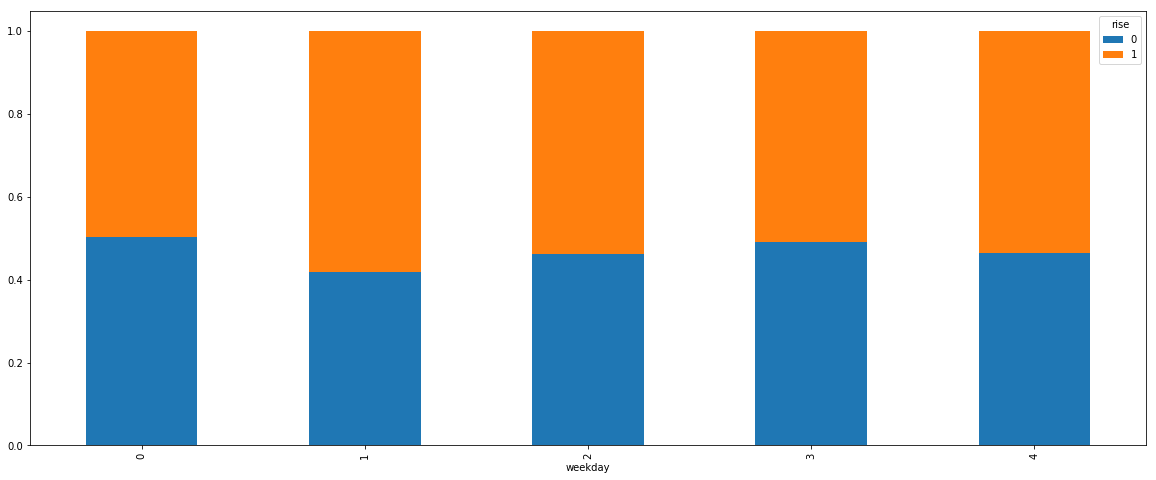

In [245]:
# 绘制柱状图
res.plot(kind='bar', figsize=(20, 8), stacked=True)
# plt.show()

In [246]:
# 透视表  分组聚合
pd.pivot_table(data, index='weekday', values='rise', aggfunc='mean')

,rise
weekday,
0,0.496000
1,0.580153
2,0.537879
3,0.507812
4,0.535433


## 分组与聚合

In [247]:
# 获取数据
col =pd.DataFrame({'color': ['white','red','green','red','green'], 'object': ['pen','pencil','pencil','ashtray','pen'],'price1':[5.56,4.20,1.30,0.56,2.75],'price2':[4.75,4.12,1.60,0.75,3.15]})

In [248]:
col

,color,object,price1,price2
0,white,pen,5.56,4.75
1,red,pencil,4.20,4.12
2,green,pencil,1.30,1.60
3,red,ashtray,0.56,0.75
4,green,pen,2.75,3.15


In [249]:
# 按颜色进行分组
col.groupby(by='color').mean()

,price1,price2
color,,
green,2.025,2.375
red,2.380,2.435
white,5.560,4.750


In [250]:
col['price1'].groupby(col['color']).mean()

color
green    2.025
red      2.380
white    5.560
Name: price1, dtype: float64

In [251]:
col.groupby(by='color')['price1'].mean()

color
green    2.025
red      2.380
white    5.560
Name: price1, dtype: float64

In [253]:
# 获取星巴克店铺数据
data = pd.read_csv('./data/directory.csv')

In [254]:
data.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51


In [260]:
# 统计星巴克在不同国家的店铺数量
res = data.groupby(by='Country').count()['Brand']

In [261]:
res

Country
AD        1
AE      144
AR      108
AT       18
AU       22
AW        3
AZ        4
BE       19
BG        5
BH       21
BN        5
BO        4
BR      102
BS       10
CA     1468
CH       61
CL       96
CN     2734
CO       11
CR       11
CW        3
CY       10
CZ       28
DE      160
DK       21
EG       31
ES      101
FI        8
FR      132
GB      901
      ...  
LU        2
MA        9
MC        2
MX      579
MY      234
NL       59
NO       17
NZ       24
OM       12
PA        5
PE       89
PH      298
PL       53
PR       24
PT       11
QA       18
RO       27
RU      109
SA      102
SE       18
SG      130
SK        3
SV       11
TH      289
TR      326
TT        3
TW      394
US    13608
VN       25
ZA        3
Name: Brand, Length: 73, dtype: int64

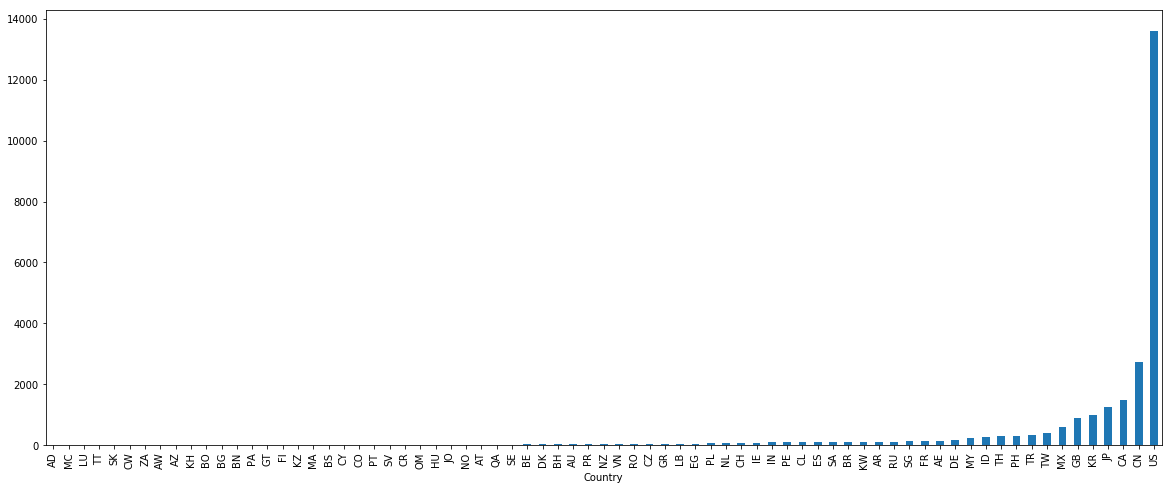

In [263]:
# 绘制柱状图
# 排序
res = res.sort_values()
res.plot(kind='bar', figsize=(20,8))
# plt.show()

### 案例

In [ ]:
现在我们有一组从2006年到2016年1000部最流行的电影数据
问题1：我们想知道这些电影数据中评分的平均分，导演的人数等信息，我们应该怎么获取？
问题2：对于这一组电影数据，如果我们想rating，runtime的分布情况，应该如何呈现数据？
问题3：对于这一组电影数据，如果我们希望统计电影分类(genre)的情况，应该如何处理数据？

In [264]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [267]:
# 读取文件
film_df = pd.read_csv('./data/IMDB-Movie-Data.csv')

In [269]:
film_df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [270]:
# 问题1：我们想知道这些电影数据中评分的平均分，导演的人数等信息，我们应该怎么获取？
film_df['Rating'].mean()

6.723199999999999

In [277]:
np.unique(film_df['Director']).shape[0]

644

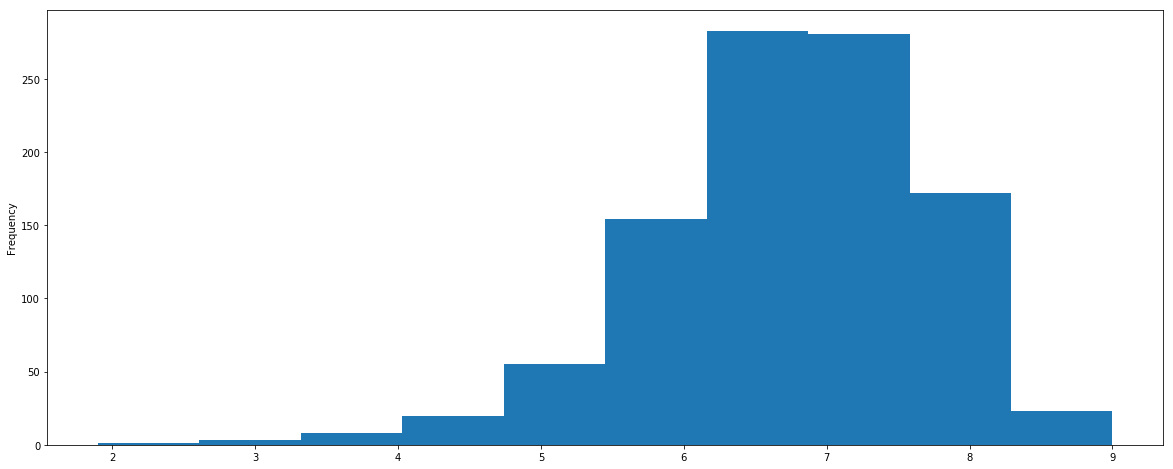

In [279]:
# 问题2：对于这一组电影数据，如果我们想rating，runtime的分布情况，应该如何呈现数据？
film_df["Rating"].plot(kind='hist', figsize=(20, 8))

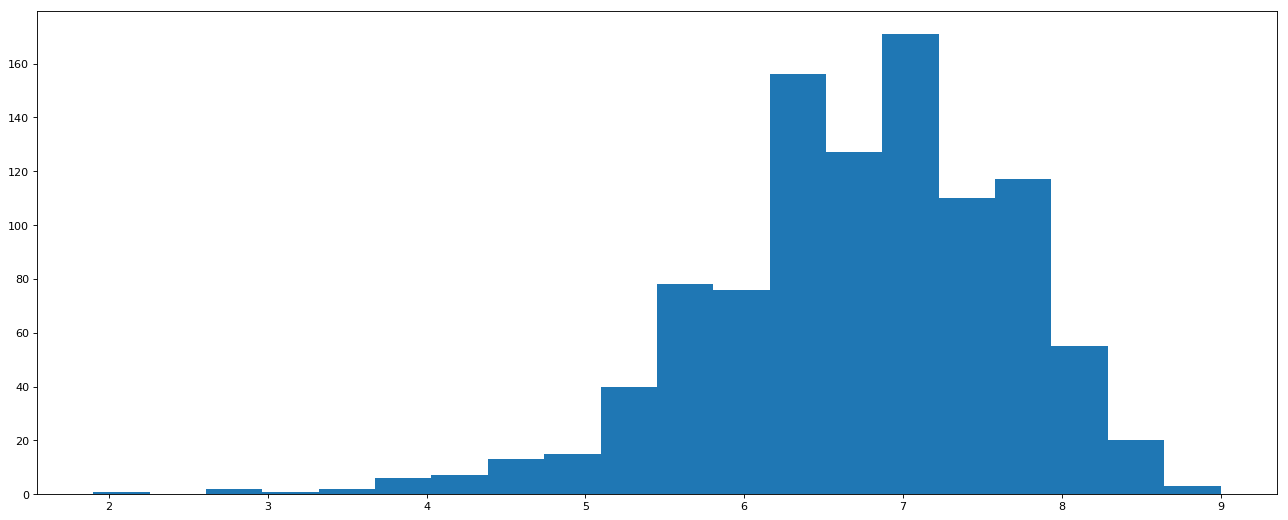

In [285]:
plt.figure(figsize=(20,8),dpi=80)
plt.hist(film_df["Rating"].values,bins=20)
plt.show()

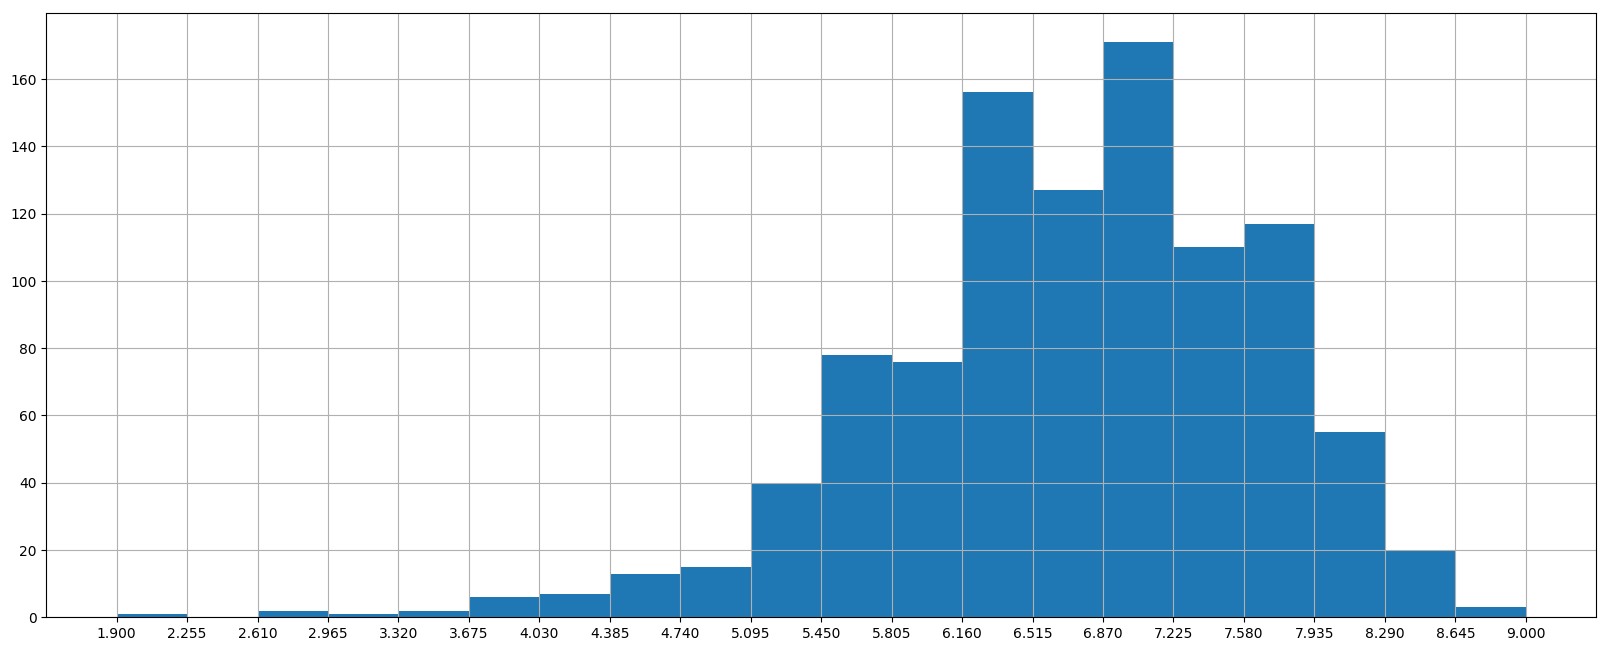

In [299]:
# 求出最大最小值
max_ = film_df["Rating"].max()
min_ = film_df["Rating"].min()

# 生成刻度列表
t1 = np.linspace(min_,max_,num=21)

# [ 1.9    2.255  2.61   2.965  3.32   3.675  4.03   4.385  4.74   5.095  5.45   5.805  6.16   6.515  6.87   7.225  7.58   7.935  8.29   8.645  9.   ]
plt.figure(figsize=(20,8),dpi=100)
plt.xticks(t1)
plt.grid()
plt.hist(film_df["Rating"].values,bins=20)


plt.show()

In [291]:
t1

array([1.9  , 2.255, 2.61 , 2.965, 3.32 , 3.675, 4.03 , 4.385, 4.74 ,
       5.095, 5.45 , 5.805, 6.16 , 6.515, 6.87 , 7.225, 7.58 , 7.935,
       8.29 , 8.645, 9.   ])

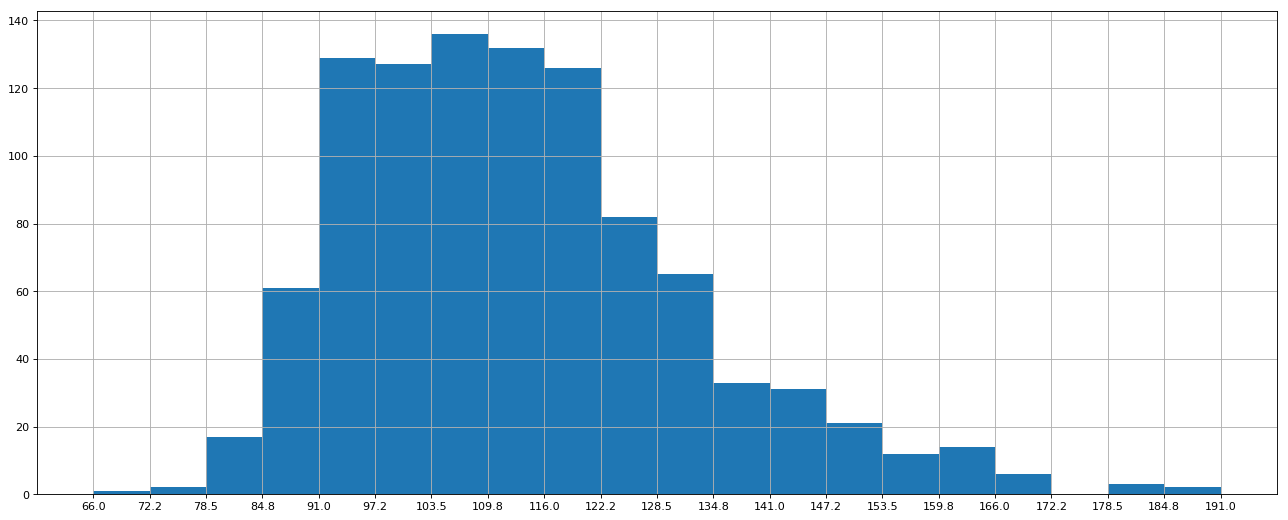

In [302]:
plt.figure(figsize=(20,8),dpi=80)
plt.hist(film_df["Runtime (Minutes)"].values,bins=20)
# 求出最大最小值
max_ = film_df["Runtime (Minutes)"].max()
min_ = film_df["Runtime (Minutes)"].min()

# # 生成刻度列表
t1 = np.linspace(min_,max_,num=21)

# 修改刻度
plt.xticks(np.linspace(min_,max_,num=21))

# 添加网格
plt.grid()
plt.show()

In [303]:
# 问题3：对于这一组电影数据，如果我们希望统计电影分类(genre)的情况，应该如何处理数据？
film_df

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


In [ ]:
思路
1、创建一个全为0的dataframe，列索引置为电影的分类，temp_df
2、遍历每一部电影，temp_df中把分类出现的列的值置为1
3、求和

In [313]:
# 进行字符串分割
temp_list = [i.split(",") for i in film_df["Genre"]]
# 获取电影的分类
genre_list = np.unique([i for j in temp_list for i in j]) 

# 增加新的列
temp_df = pd.DataFrame(np.zeros([film_df.shape[0],genre_list.shape[0]]),columns=genre_list)

In [314]:
temp_df

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [318]:
for i in range(1000):
    #temp_list[i] ['Action','Adventure','Animation']
    temp_df.loc[i,temp_list[i]]=1
print(temp_df.sum().sort_values())

Musical        5.0
Western        7.0
War           13.0
Music         16.0
Sport         18.0
History       29.0
Animation     49.0
Family        51.0
Biography     81.0
Fantasy      101.0
Mystery      106.0
Horror       119.0
Sci-Fi       120.0
Romance      141.0
Crime        150.0
Thriller     195.0
Adventure    259.0
Comedy       279.0
Action       303.0
Drama        513.0
dtype: float64


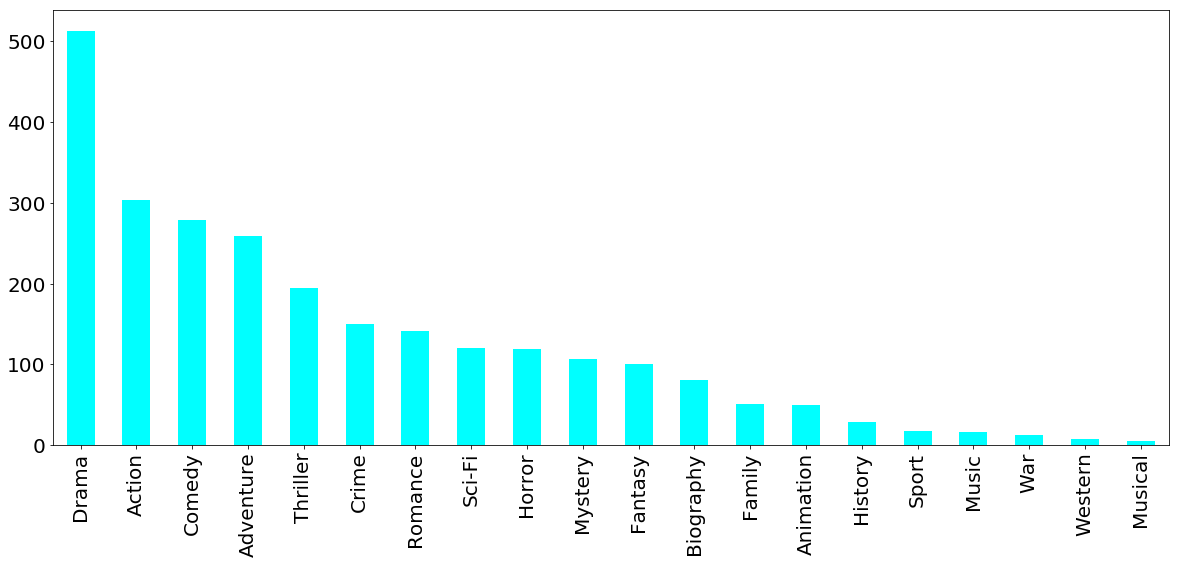

In [319]:
temp_df.sum().sort_values(ascending=False).plot(kind="bar",figsize=(20,8),fontsize=20,colormap="cool")